# On the Measure Of Intelligence

This is a demo notebook for the Abstraction and Reasoning Corpus (ARC) dataset from the paper, [On the Measure of Intelligence](https://arxiv.org/abs/1911.01547).  
The author highlights the limitations of contemporary AI community that measures task specific skills that can make these systems appear intelligent by acquiring skills from prior knowledge and experiences.

> We note that in practice, the contemporary AI community still gravitates towards benchmarking intelligence by comparing the skill exhibited by AIs and humans at specific tasks ... We argue that solely measuring skill at any given task falls short of measuring intelligence, because skill is heavily modulated by prior knowledge and experience ... that masks the system’s own generalization power. We then articulate a new formal definition of intelligence based on Algorithmic Information Theory, describing intelligence as skill-acquisition efficiency and highlighting the concepts of scope, generalization difficulty, priors, and experience ... Using this definition, we propose a set of guidelines for what a general AI benchmark should look like ... present a new benchmark closely following these guidelines, the Abstraction and Reasoning Corpus (ARC), built upon an explicit set of priors designed to be as close as possible to innate human priors ... a human-like form of general fluid intelligence and that ... enables fair general intelligence comparisons between AI systems and humans.
>
> --<cite> François Chollet

# Demo code

In [1]:
import os
import numpy as np
import ipywidgets as widgets
from functools import partial
import matplotlib.pyplot as plt

from demo.utils import load_json, plot_example
from demo.callbacks import onclick, check_answer
from demo.dataclasses import JSONExample, AnswerGrid
from demo.constants import COLOR_KWARGS, PLOT_W, PLOT_H, MIN_NUM_GRID, MAX_NUM_GRID

## Show Demonstration

Get `JSON` file names located in the `ARC` training dataset.

In [2]:
data_dir = "ARC/data/evaluation"
files = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.endswith(".json")]

Display the example demonstrations for a random task.

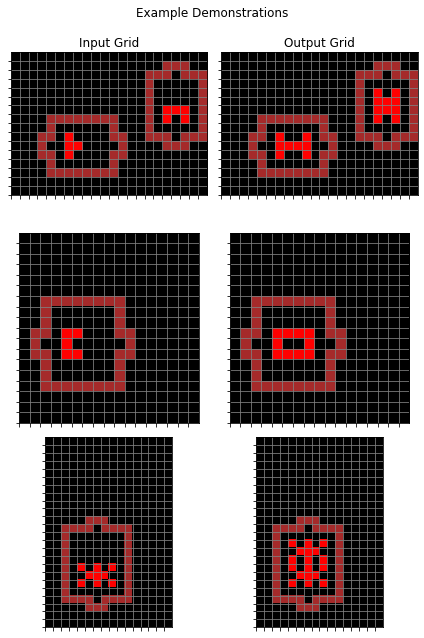

In [3]:
%matplotlib inline
data_path = np.random.choice(files)
example = JSONExample(data_path)
demo_fig = example.plot_demonstrations(fig_w=3, fig_h=3, **COLOR_KWARGS)
plt.tight_layout()

## Answer Grids

Click to get more information about the following sections. 

<details>
  <summary><b>Input Answer</b></summary>  
  
  The `Test Answer Grid` can be filled by clicking on the grid pixels.  

  |  Mouse Event  |       Action       |
  | :------------ | :----------------- |
  | Left Click    | -1 Pixel Value     |
  | Middle Click  | Resize Answer Grid |
  | Right Click   | +1 Pixel Value     |  
  
</details>

<details>
  <summary><b>Change Answer Grid size</b></summary>  
  
  The size of the `Test Answer Grid` can be easily changed by dragging the `bottom-right` corner of the figure.   
  
</details>


<details>
  <summary><b>Resize Answer Grid</b></summary>
    
  By default, the input answer grid is similar to the input test grid. This is because most of the answers involve making modifications to the input grid. However, some answer grids have different shape and values compared to the input test grid. Therefore, to resize the answer grid, following the following steps:
  1. Set the `width` and `height` values of the answer grid.
  1. Middle mouse click on the `Test Answer Grid`.  
  
  > In case, the middle mouse click is not responding, please run the 2 cells below again.  

</details>

<details>
  <summary><b>Check answer</b></summary>

  When the pixels in the `Test Answer Grid` are ready, click on the `Check Answer` button. This will display a text alert to indicate if the answer and the true output are same.  

  To display the true answer, click on the `Show Answer` tab.
</details>

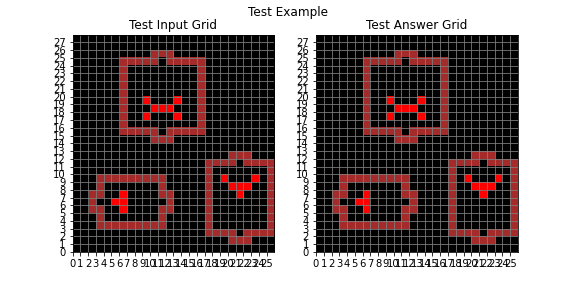

In [4]:
# Prepare widgets
ans_grid = AnswerGrid(np.array(example.test["input"]))
h, w = np.shape(example.test["input"])
width = widgets.IntSlider(value=w, min=MIN_NUM_GRID, max=MAX_NUM_GRID, description='Width:')     # TODO: Fix the min-max boundaries
height = widgets.IntSlider(value=h, min=MIN_NUM_GRID, max=MAX_NUM_GRID, description='Height:')
check_btn = widgets.Button(description="Check Answer")
true_output = widgets.Output()
check_btn.on_click(partial(check_answer, example, ans_grid))
app_layout = widgets.AppLayout(
    left_sidebar = widgets.VBox([width, height]),
    right_sidebar = check_btn,
    width = "800px",
    pane_widths = [0.4, 0.4, 0.2]
)

# Plot true output in the true_output display widget
%matplotlib inline
with true_output:
    fig, ax = plt.subplots(figsize=(PLOT_W, PLOT_H))
    plot_example(ax, example.test["output"], hide_ticks=False, **COLOR_KWARGS)
    plt.tight_layout()
    plt.show(fig)

    # Prepare tab widgets
tab = widgets.Tab()
tab.children = [app_layout, true_output]
tab.set_title(0, "Input")
tab.set_title(1, "Show Answer")

# Plot the interactive answer grid
%matplotlib widget
test_fig, (input_ax, output_ax) = plt.subplots(nrows=1, ncols=2, figsize=(2*PLOT_W, PLOT_H))
test_fig.suptitle("Test Example")
input_ax.set_title("Test Input Grid")
output_ax.set_title("Test Answer Grid")

plot_example(input_ax, example.test["input"], hide_ticks=False, **COLOR_KWARGS)
plot_example(output_ax, ans_grid.data, hide_ticks=False, **COLOR_KWARGS)
cid = test_fig.canvas.mpl_connect('button_press_event', partial(onclick, output_ax, ans_grid, width, height, COLOR_KWARGS))                 # Make the answer grid interactive

In [5]:
tab